## Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *
import math

In [2]:
df = pd.read_csv("conspan_clean.csv")

In [3]:
df.head()

,Employee ID,Age,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRotation,...,RelationshipSatisfaction,Tools,TotalWorkingYears,Training,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Performance
0,64,25.0,Production,2,3.0,1.0,Male,3,1,1,...,3.0,L,6.0,N,3.0,2.0,2.0,0.0,2.0,47
1,339,32.0,Research and Development,7,4.0,2.0,Female,4,1,2,...,4.0,L,6.0,Y,3.0,3.0,2.0,0.0,2.0,61
2,376,33.0,Research and Development,9,3.0,4.0,Male,2,3,2,...,3.0,L,9.0,Y,3.0,3.0,2.0,1.0,2.0,62
3,429,36.0,Sales,18,2.0,2.0,Male,2,3,4,...,2.0,H,10.0,Y,3.0,10.0,9.0,9.0,0.0,82
4,441,32.0,Research and Development,17,3.0,4.0,Male,3,2,4,...,3.0,L,10.0,Y,2.0,9.0,5.0,1.0,6.0,67


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               1172 non-null   int64  
 1   Age                       1172 non-null   float64
 2   Department                1172 non-null   object 
 3   DistanceFromHome          1172 non-null   int64  
 4   Education                 1172 non-null   float64
 5   EnvironmentSatisfaction   1172 non-null   float64
 6   Gender                    1172 non-null   object 
 7   JobInvolvement            1172 non-null   int64  
 8   JobLevel                  1172 non-null   int64  
 9   JobRotation               1172 non-null   int64  
 10  FeedbackFromManager       1172 non-null   object 
 11  Mentoring                 1172 non-null   object 
 12  Autonomy                  1172 non-null   object 
 13  JobRole                   1172 non-null   object 
 14  MonthlyI

## Feature Importance mapping

In [5]:
unimp_cols = ['WorkLifeBalance', 'JobInvolvement', 'RelationshipSatisfaction', 'Age', 'Gender', 'Education', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'NumCompaniesWorked', 'PercentSalaryHike', 'DistanceFromHome', 'Employee ID']

In [6]:
filtered_df = df.drop(columns = unimp_cols)

In [7]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Department               1172 non-null   object 
 1   EnvironmentSatisfaction  1172 non-null   float64
 2   JobLevel                 1172 non-null   int64  
 3   JobRotation              1172 non-null   int64  
 4   FeedbackFromManager      1172 non-null   object 
 5   Mentoring                1172 non-null   object 
 6   Autonomy                 1172 non-null   object 
 7   JobRole                  1172 non-null   object 
 8   MonthlyIncome            1172 non-null   float64
 9   OverTime                 1172 non-null   object 
 10  Tools                    1172 non-null   object 
 11  TotalWorkingYears        1172 non-null   float64
 12  Training                 1172 non-null   object 
 13  YearsWithCurrManager     1172 non-null   float64
 14  Performance             

### Linear Regression

In [8]:
s = setup(data=filtered_df, target='Performance', session_id=123)

,Description,Value
0,Session id,123
1,Target,Performance
2,Target type,Regression
3,Original data shape,"(1172, 15)"
4,Transformed data shape,"(1172, 32)"
5,Transformed train set shape,"(820, 32)"
6,Transformed test set shape,"(352, 32)"
7,Numeric features,6
8,Categorical features,8
9,Preprocess,True


In [9]:
linear_reg = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.0477,107.5658,10.3714,0.5424,0.2373,0.1935
1,7.5665,99.6762,9.9838,0.6086,0.2218,0.1747
2,7.1818,104.7989,10.2371,0.5558,0.2015,0.1509
3,7.7172,97.3673,9.8675,0.5567,0.2125,0.1753
4,7.8606,108.6306,10.4226,0.5266,0.2058,0.1635
5,8.3804,131.9714,11.4879,0.4870,0.2883,0.2319
6,9.7084,168.8180,12.9930,0.3564,0.2403,0.1872
7,6.9009,89.6925,9.4706,0.5697,0.1878,0.1404
8,9.0022,142.4615,11.9357,0.4594,0.3170,0.2655


In [10]:
tuned_model = tune_model(linear_reg, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.0486,107.5756,10.3719,0.5424,0.2373,0.1936
1,7.5631,99.6139,9.9807,0.6088,0.2217,0.1747
2,7.1816,104.7852,10.2365,0.5559,0.2015,0.1509
3,7.7173,97.3231,9.8652,0.5569,0.2126,0.1753
4,7.8617,108.6214,10.4222,0.5267,0.2058,0.1635
5,8.3797,131.9944,11.4889,0.4869,0.2883,0.2319
6,9.7071,168.8285,12.9934,0.3563,0.2403,0.1872
7,6.9012,89.6969,9.4708,0.5697,0.1878,0.1404
8,9.0042,142.4883,11.9368,0.4593,0.3170,0.2655


Fitting 10 folds for each of 2 candidates, totalling 20 fits


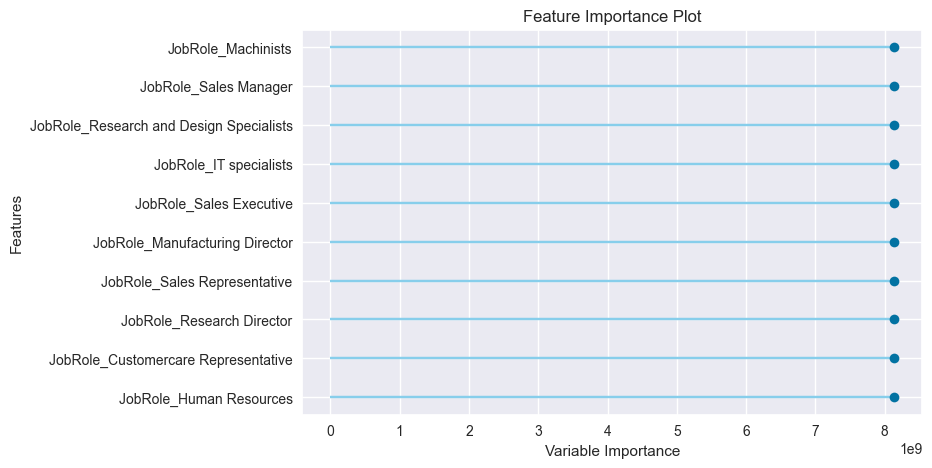

In [11]:
plot_model(tuned_model, plot="feature")

### Better Models

In [12]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,6.2324,69.8672,8.3053,0.7124,0.1891,0.1436,0.0350
gbr,Gradient Boosting Regressor,6.4321,72.9151,8.4873,0.7006,0.1934,0.1496,0.0190
lightgbm,Light Gradient Boosting Machine,6.6717,78.0767,8.7942,0.6781,0.1966,0.1523,0.0910
et,Extra Trees Regressor,6.5770,78.1492,8.8022,0.6775,0.1970,0.1502,0.0290
ada,AdaBoost Regressor,8.1454,98.5749,9.9086,0.5919,0.2173,0.1799,0.0160
br,Bayesian Ridge,7.9997,114.2752,10.6411,0.5296,0.2307,0.1841,0.0100
ridge,Ridge Regression,8.0381,115.1340,10.6813,0.5261,0.2317,0.1846,0.0100
dt,Decision Tree Regressor,8.1134,123.5427,11.0733,0.4883,0.2578,0.1794,0.0100
llar,Lasso Least Angle Regression,8.3042,130.9815,11.3815,0.4617,0.2453,0.1951,0.0090
lasso,Lasso Regression,8.3042,130.9816,11.3815,0.4617,0.2453,0.1951,0.0090


In [13]:
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.7061,56.0491,7.4866,0.7616,0.1822,0.1375
1,5.3166,50.3565,7.0962,0.8023,0.1719,0.1256
2,6.1507,76.4401,8.7430,0.6760,0.1633,0.1207
3,5.8450,60.1802,7.7576,0.7260,0.1644,0.1236
4,6.8844,73.7209,8.5861,0.6788,0.1678,0.1342
5,6.3998,99.8695,9.9935,0.6118,0.2745,0.2075
6,7.3155,97.4565,9.8720,0.6284,0.1881,0.1398
7,5.3116,45.4290,6.7401,0.7821,0.1383,0.1061
8,6.9423,94.6265,9.7276,0.6409,0.2950,0.2316


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [14]:
final_model = finalize_model(tuned_model)

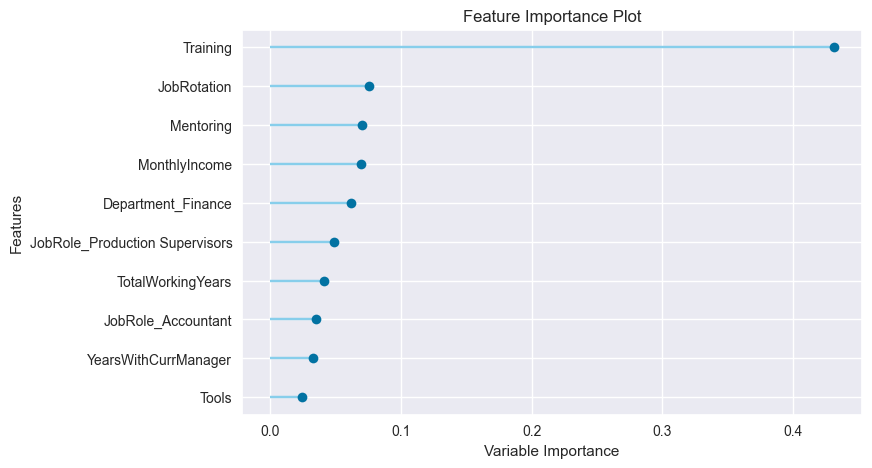

In [15]:
plot_model(final_model, plot="feature")

### Full Data

In [16]:
reg_setup = setup(
    data=df,
    target='Performance',
    session_id=42,
    normalize=True,
    transformation=True,
    polynomial_features=True,
    ignore_features=['Employee ID'],
    remove_multicollinearity=True,
    multicollinearity_threshold=0.9,
    fold=5,
    use_gpu=True,
    verbose=False
)

  File "C:\Users\paint\PycharmProjects\Studio2\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\paint\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\paint\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\paint\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 5060 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there a

In [17]:
top3 = compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,6.2863,71.2036,8.3969,0.7043,0.1929,0.1454,1.4780
rf,Random Forest Regressor,6.4343,73.6944,8.5678,0.6951,0.1967,0.1498,1.6060
gbr,Gradient Boosting Regressor,6.5413,75.0500,8.6569,0.6889,0.1986,0.1519,2.1640
br,Bayesian Ridge,7.0193,83.2603,9.0964,0.6551,0.2048,0.1612,1.4360
lightgbm,Light Gradient Boosting Machine,7.0325,86.4960,9.2960,0.6400,0.2082,0.1613,1.7660
omp,Orthogonal Matching Pursuit,7.3550,89.3466,9.4228,0.6287,0.2117,0.1674,1.2660
lasso,Lasso Regression,7.2029,92.1641,9.5821,0.6200,0.2146,0.1684,1.2680
llar,Lasso Least Angle Regression,7.2028,92.1665,9.5822,0.6200,0.2146,0.1684,1.3000
en,Elastic Net,7.2365,92.7137,9.6039,0.6185,0.2148,0.1689,2.4720
ada,AdaBoost Regressor,7.7594,94.8812,9.7399,0.6036,0.2154,0.1761,1.7500


In [18]:
stacked_model = stack_models(top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.1923,68.3599,8.2680,0.7359,0.1944,0.1480
1,5.3279,50.1086,7.0787,0.7938,0.1635,0.1213
2,6.2050,64.3602,8.0225,0.7061,0.1833,0.1413
3,6.6347,85.0748,9.2236,0.6984,0.2417,0.1763
4,6.2724,68.2627,8.2621,0.6734,0.1657,0.1271
Mean,6.1265,67.2333,8.1710,0.7215,0.1897,0.1428
Std,0.4308,11.1549,0.6842,0.0413,0.0284,0.0193


In [19]:
best_tuned = tune_model(stacked_model, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.2023,68.7566,8.2920,0.7344,0.1952,0.1487
1,5.3283,50.1775,7.0836,0.7936,0.1635,0.1210
2,6.1979,64.2616,8.0163,0.7065,0.1834,0.1414
3,6.6351,85.0909,9.2245,0.6983,0.2417,0.1764
4,6.2288,67.5328,8.2178,0.6769,0.1650,0.1268
Mean,6.1185,67.1639,8.1668,0.7219,0.1898,0.1429
Std,0.4282,11.1446,0.6831,0.0403,0.0285,0.0195


Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [20]:
final_model = finalize_model(best_tuned)

--- Feature Importance for: Extra Trees Regressor ---


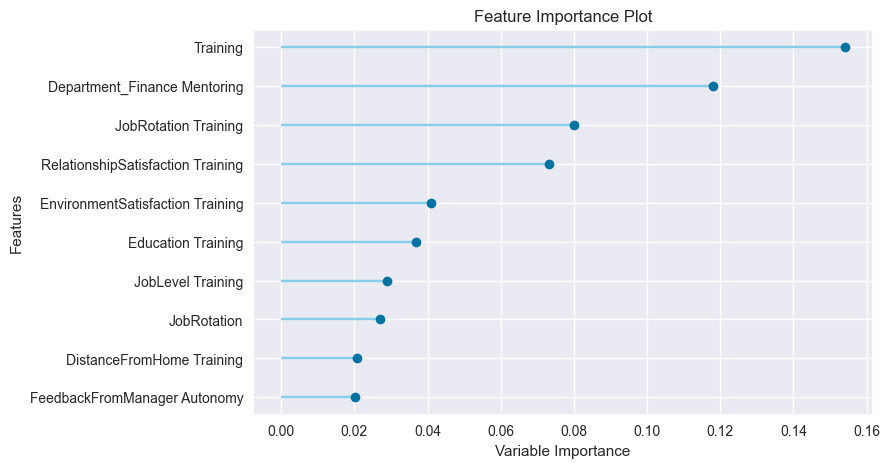

--- Feature Importance for: Random Forest Regressor ---


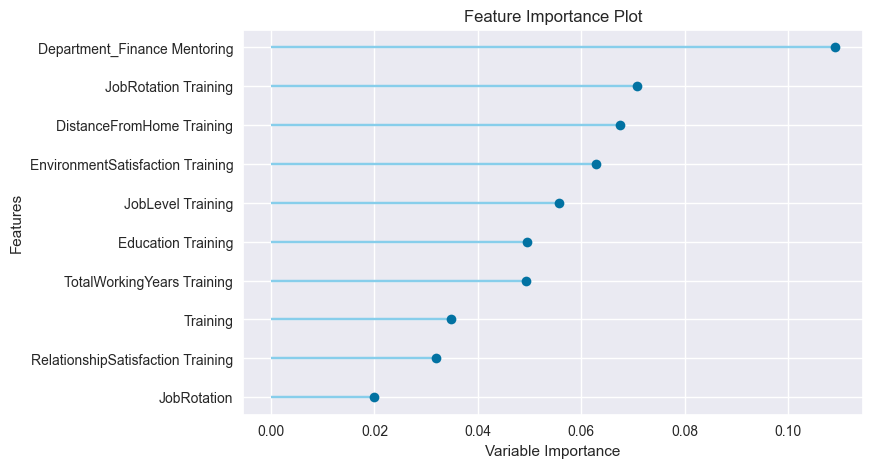

--- Feature Importance for: Gradient Boosting Regressor ---


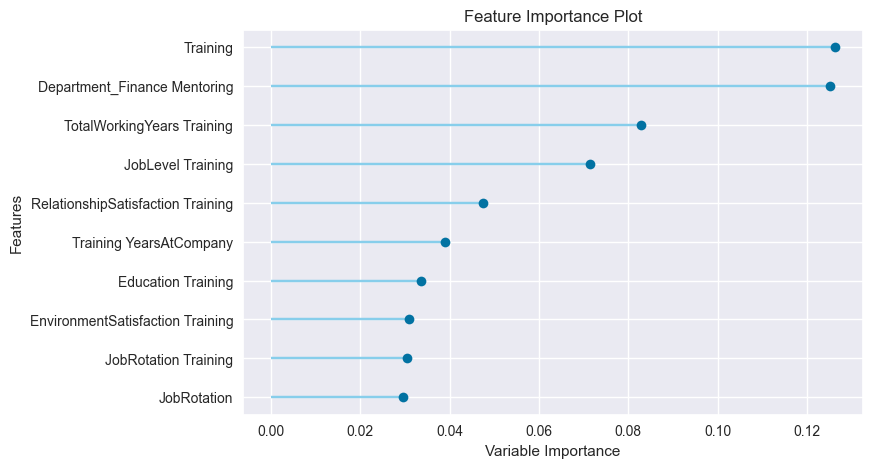

In [21]:
base_estimators = best_tuned.estimators_
estimator_names = [name for name, model in best_tuned.estimators]

for i, model in enumerate(base_estimators):
    print(f"--- Feature Importance for: {estimator_names[i]} ---")
    plot_model(model, plot='feature')